In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [2]:
# import small dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
indices = np.random.choice(len(X), 30)
X = X[indices]
y = y[indices]
print(y)

[2 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 2 2 2 0 0 2 1 2 2 0 0 1 0 1]


C:\Users\weeks\AppData\Local\Temp\ipykernel_12436\3393135302.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=48, azim=134)


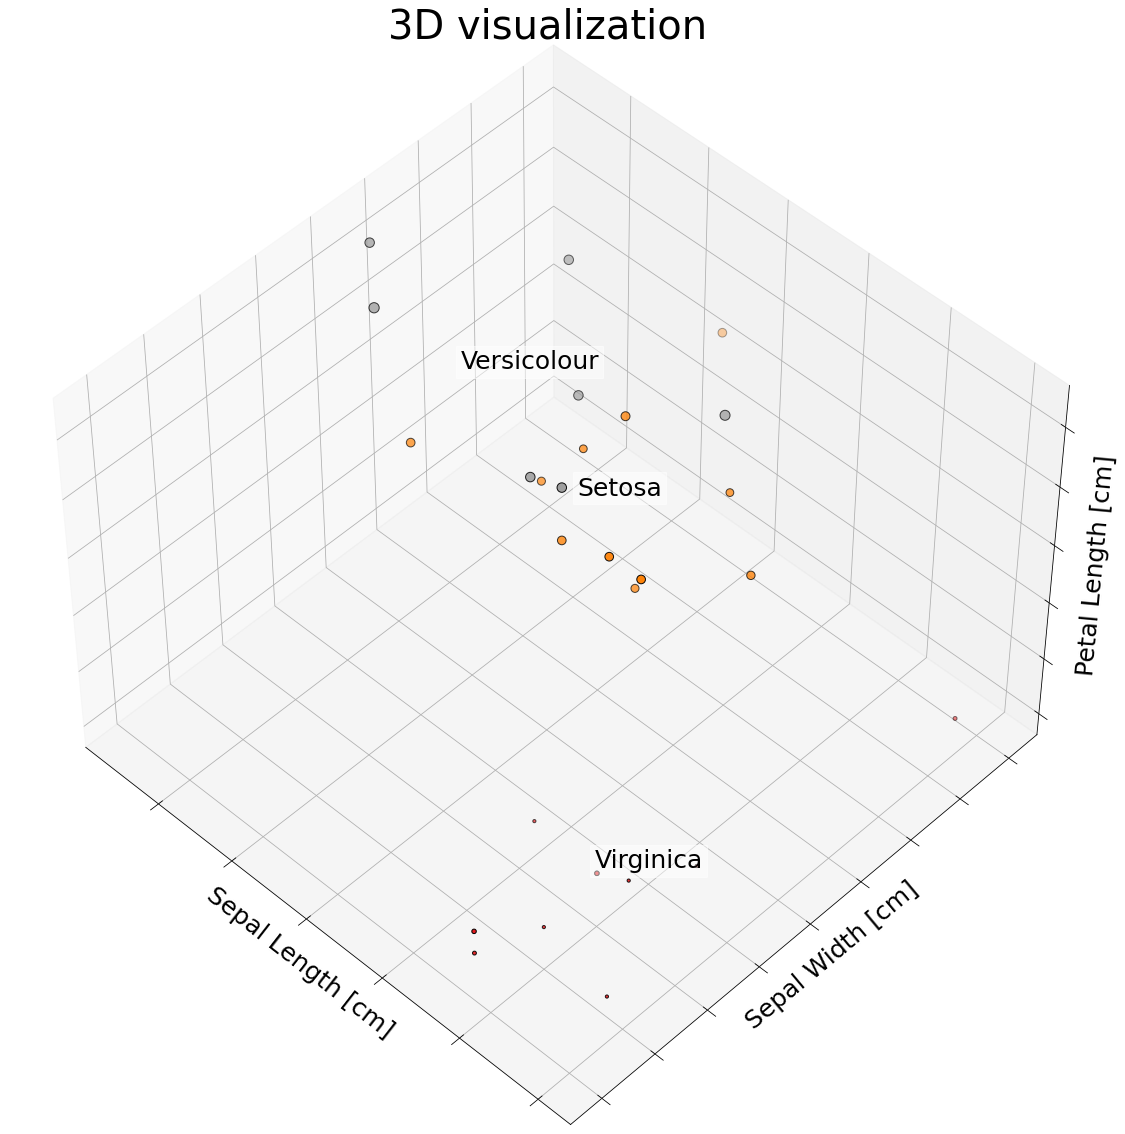

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
        cmap=plt.cm.Set1, edgecolor='k', s=X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1),
        ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=0.5, edgecolor='w', facecolor='w'),
              size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %')

Accuracy of our model is equal 83.33 %


In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=10)
mlp.fit(X_train, y_train)

c:\Users\weeks\miniconda3\envs\oneShot\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=10)

In [13]:
predictions = mlp.predict(X_test)

accuracy = accuracy_score(y_test, predictions)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal 16.67%
